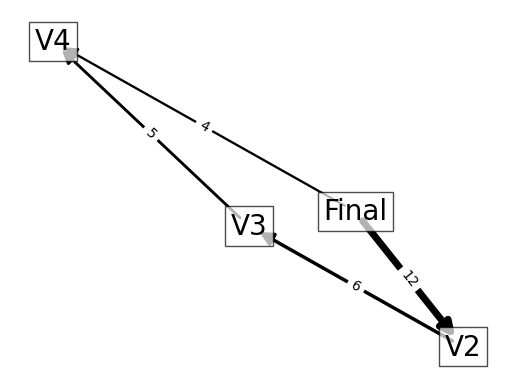

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def plot_graph(adjacency_matrix, node_labels):
    # Create a directed graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
    
    # Rename nodes using labels
    mapping = {i: label for i, label in enumerate(node_labels)}
    G = nx.relabel_nodes(G, mapping)
    
    # Positions for all nodes
    pos = nx.spring_layout(G, seed=13)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, alpha=0)
    
    # Compute edge widths based on the weight of the edges
    edge_weights = nx.get_edge_attributes(G, 'weight')
    max_weight = max(edge_weights.values())
    edge_widths = [float(weight) / max_weight * 5 for weight in edge_weights.values()]
    
    # Draw edges with widths proportional to the weight
    nx.draw_networkx_edges(G, pos, width=edge_widths, arrowsize=20)
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Draw node labels
    label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif', bbox=label_options)
    
    # Display the graph
    plt.axis('off')
    plt.show()
    
    
# Define the adjacency matrix
A = np.array([
    [0, 12, 0, 4],
    [0, 0, 6, 0],
    [0, 0, 0, 5],
    [0, 0, 0, 0]
])

# Define node labels
node_labels = ['Final', 'V2', 'V3', 'V4']
plot_graph(A, node_labels)